In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
df = pd.read_csv("data/diabetes.csv")

# 데이터 형태 확인 (행, 컬럼)
print(df.shape)

(768, 9)


## 데이터셋 나누기

In [2]:
# 8:2 의 비율로 구하기 위해 전체 데이터의 행에서 80% 위치에 해당되는 값을 구해서 split_count 라는 변수에 담습니다.
split_count = int(df.shape[0] * 0.8)
split_count
# train, test로 슬라이싱을 통해 데이터를 나눕니다.
train = df[:split_count].copy()
test = df[split_count:].copy()
print(train.shape, test.shape)
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.
feature_names = train.columns[:-1].tolist()
label_name = train.columns[-1]

# Outcome은 결과이므로 train에서 제외!!
print(feature_names)
print(label_name)

# 학습 세트 만들기 예) 시험의 기출문제
X_train = train[feature_names]
y_train = train[label_name]
print(X_train.shape)
print(y_train.shape)
# 예측에 사용할 데이터세트를 만듭니다. 예) 실전 시험 문제
X_test = test[feature_names]
y_test = test[label_name]
print(X_test.shape)
print(y_test.shape)

(614, 9) (154, 9)
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Outcome
(614, 8)
(614,)
(154, 8)
(154,)


# 모델 불러와서 사용하기

In [3]:
# 모델 불러오기
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model
# 학습
model.fit(X_train, y_train)
# 예측
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 1, 0, 1], dtype=int64)

## 정확도측정

In [4]:
# 직접구하기 (모델의 Random state고정을 하지 않았다면 결과값이 달라질 수 있다)

# 실제값 - 예측값을 빼주면 같은 값은 0으로 나오게 됩니다. 
# 여기에서 절대값을 씌운 값이 1인 값이 다르게 예측한 값이 됩니다.

diff_count = abs(y_test - y_predict).sum()
print(diff_count)
# 예측의 정확도를 구합니다. 100점 만점 중에 몇 점을 맞았는지 구한다고 보면 됩니다.

(len(y_test) - diff_count) / len(y_test) * 100


44


71.42857142857143

In [5]:
# 위에서 처럼 직접 구할 수도 있지만 미리 구현된 알고리즘을 가져와 사용합니다.
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

71.42857142857143

# 수치형 변수를 범주형 변수로

In [6]:
df["Pregnancies_high"] = df["Pregnancies"] > 6
df[["Pregnancies", "Pregnancies_high"]].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


## 데이터셋 나누기

In [7]:
# 8:2 의 비율로 구하기 위해 전체 데이터의 행에서 80% 위치에 해당되는 값을 구해서 split_count 라는 변수에 담습니다.
split_count = int(df.shape[0] * 0.8)
split_count
# train, test로 슬라이싱을 통해 데이터를 나눕니다.
train = df[:split_count].copy()
test = df[split_count:].copy()
print(train.shape, test.shape)

(614, 10) (154, 10)


In [8]:

# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.
feature_names = train.columns.tolist()
feature_names.remove('Pregnancies')
feature_names.remove('Outcome')
feature_names

label_name = 'Outcome'
label_name

'Outcome'

In [9]:

# Outcome은 결과이므로 train에서 제외!!
print(feature_names)
print(label_name)

# 학습 세트 만들기 예) 시험의 기출문제
X_train = train[feature_names]
y_train = train[label_name]
print(X_train.shape)
print(y_train.shape)
# 예측에 사용할 데이터세트를 만듭니다. 예) 실전 시험 문제
X_test = test[feature_names]
y_test = test[label_name]
print(X_test.shape)
print(y_test.shape)

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high']
Outcome
(614, 8)
(614,)
(154, 8)
(154,)


# 모델 불러와서 사용하기

In [10]:
# 모델 불러오기
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model
# 학습
model.fit(X_train, y_train)
# 예측
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 1, 0, 1], dtype=int64)

<Axes: >

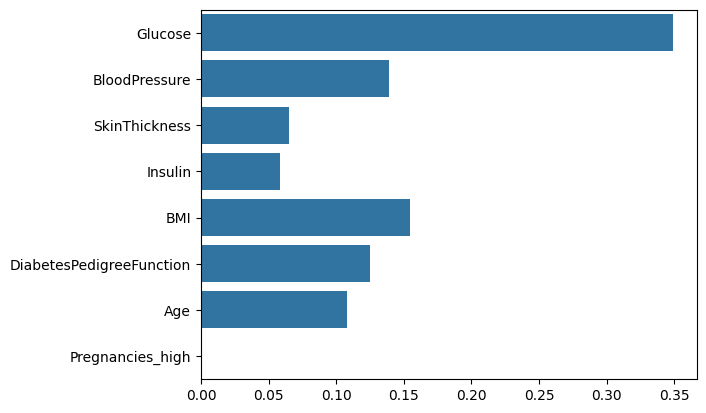

In [11]:
# 피처의 중요도 시각화 하기

sns.barplot(x=model.feature_importances_, y=feature_names)

## 정확도측정

In [12]:
# 직접구하기 (모델의 Random state고정을 하지 않았다면 결과값이 달라질 수 있다)

# 실제값 - 예측값을 빼주면 같은 값은 0으로 나오게 됩니다. 
# 여기에서 절대값을 씌운 값이 1인 값이 다르게 예측한 값이 됩니다.

diff_count = abs(y_test - y_predict).sum()
print(diff_count)
# 예측의 정확도를 구합니다. 100점 만점 중에 몇 점을 맞았는지 구한다고 보면 됩니다.

(len(y_test) - diff_count) / len(y_test) * 100


39


74.67532467532467

In [13]:
# 위에서 처럼 직접 구할 수도 있지만 미리 구현된 알고리즘을 가져와 사용합니다.
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

74.67532467532467

# Age를 범주화 (25세)

In [14]:
# One-Hot-Encoding
# 수치 => 범주 => 수치
df["Age_low"] = df["Age"] < 25
df["Age_middle"] = (df["Age"] >= 25) & (df["Age"] <= 60)
df["Age_high"] = df["Age"] > 60
df[["Age", "Age_low", "Age_middle", "Age_high"]].head()

,Age,Age_low,Age_middle,Age_high
0,50,False,True,False
1,31,False,True,False
2,32,False,True,False
3,21,True,False,False
4,33,False,True,False


<Axes: xlabel='Age_high', ylabel='count'>

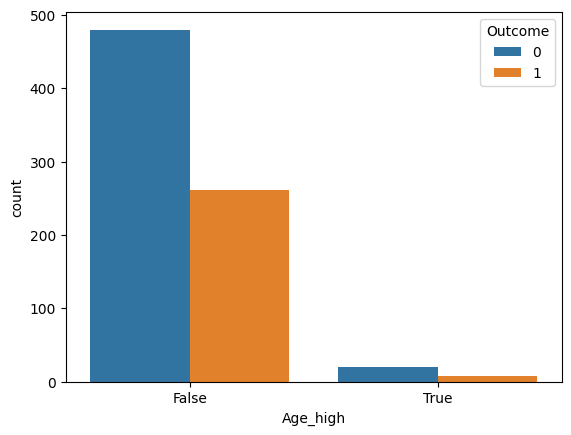

In [15]:
sns.countplot(data=df, x="Age_high", hue="Outcome")

# 데이터셋 나누기

In [16]:
# 8:2 의 비율로 구하기 위해 전체 데이터의 행에서 80% 위치에 해당되는 값을 구해서 split_count 라는 변수에 담습니다.
split_count = int(df.shape[0] * 0.8)
split_count
# train, test로 슬라이싱을 통해 데이터를 나눕니다.
train = df[:split_count].copy()
test = df[split_count:].copy()
print(train.shape, test.shape)

(614, 13) (154, 13)


In [17]:

# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.
feature_names = train.columns.tolist()
feature_names.remove('Pregnancies')
feature_names.remove('Outcome')
feature_names.remove('Age')
feature_names

label_name = 'Outcome'
label_name

'Outcome'

In [18]:

# Outcome은 결과이므로 train에서 제외!!
print(feature_names)
print(label_name)

# 학습 세트 만들기 예) 시험의 기출문제
X_train = train[feature_names]
y_train = train[label_name]
print(X_train.shape)
print(y_train.shape)
# 예측에 사용할 데이터세트를 만듭니다. 예) 실전 시험 문제
X_test = test[feature_names]
y_test = test[label_name]
print(X_test.shape)
print(y_test.shape)

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Pregnancies_high', 'Age_low', 'Age_middle', 'Age_high']
Outcome
(614, 10)
(614,)
(154, 10)
(154,)


In [19]:
X_train = train[feature_names]
X_train.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Pregnancies_high,Age_low,Age_middle,Age_high
0,148,72,35,0,33.6,0.627,False,False,True,False
1,85,66,29,0,26.6,0.351,False,False,True,False
2,183,64,0,0,23.3,0.672,True,False,True,False
3,89,66,23,94,28.1,0.167,False,True,False,False
4,137,40,35,168,43.1,2.288,False,False,True,False


In [20]:
X_test = test[feature_names]
X_test.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Pregnancies_high,Age_low,Age_middle,Age_high
614,138,74,26,144,36.1,0.557,True,False,True,False
615,106,72,0,0,25.8,0.207,False,False,True,False
616,117,96,0,0,28.7,0.157,False,False,True,False
617,68,62,13,15,20.1,0.257,False,True,False,False
618,112,82,24,0,28.2,1.282,True,False,True,False


In [21]:
y_test = test[label_name]
y_test.head()

614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

In [22]:
# 모델 불러오기
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model

DecisionTreeClassifier(random_state=42)

In [23]:
# 학습
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [24]:
# 예측
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 1], dtype=int64)

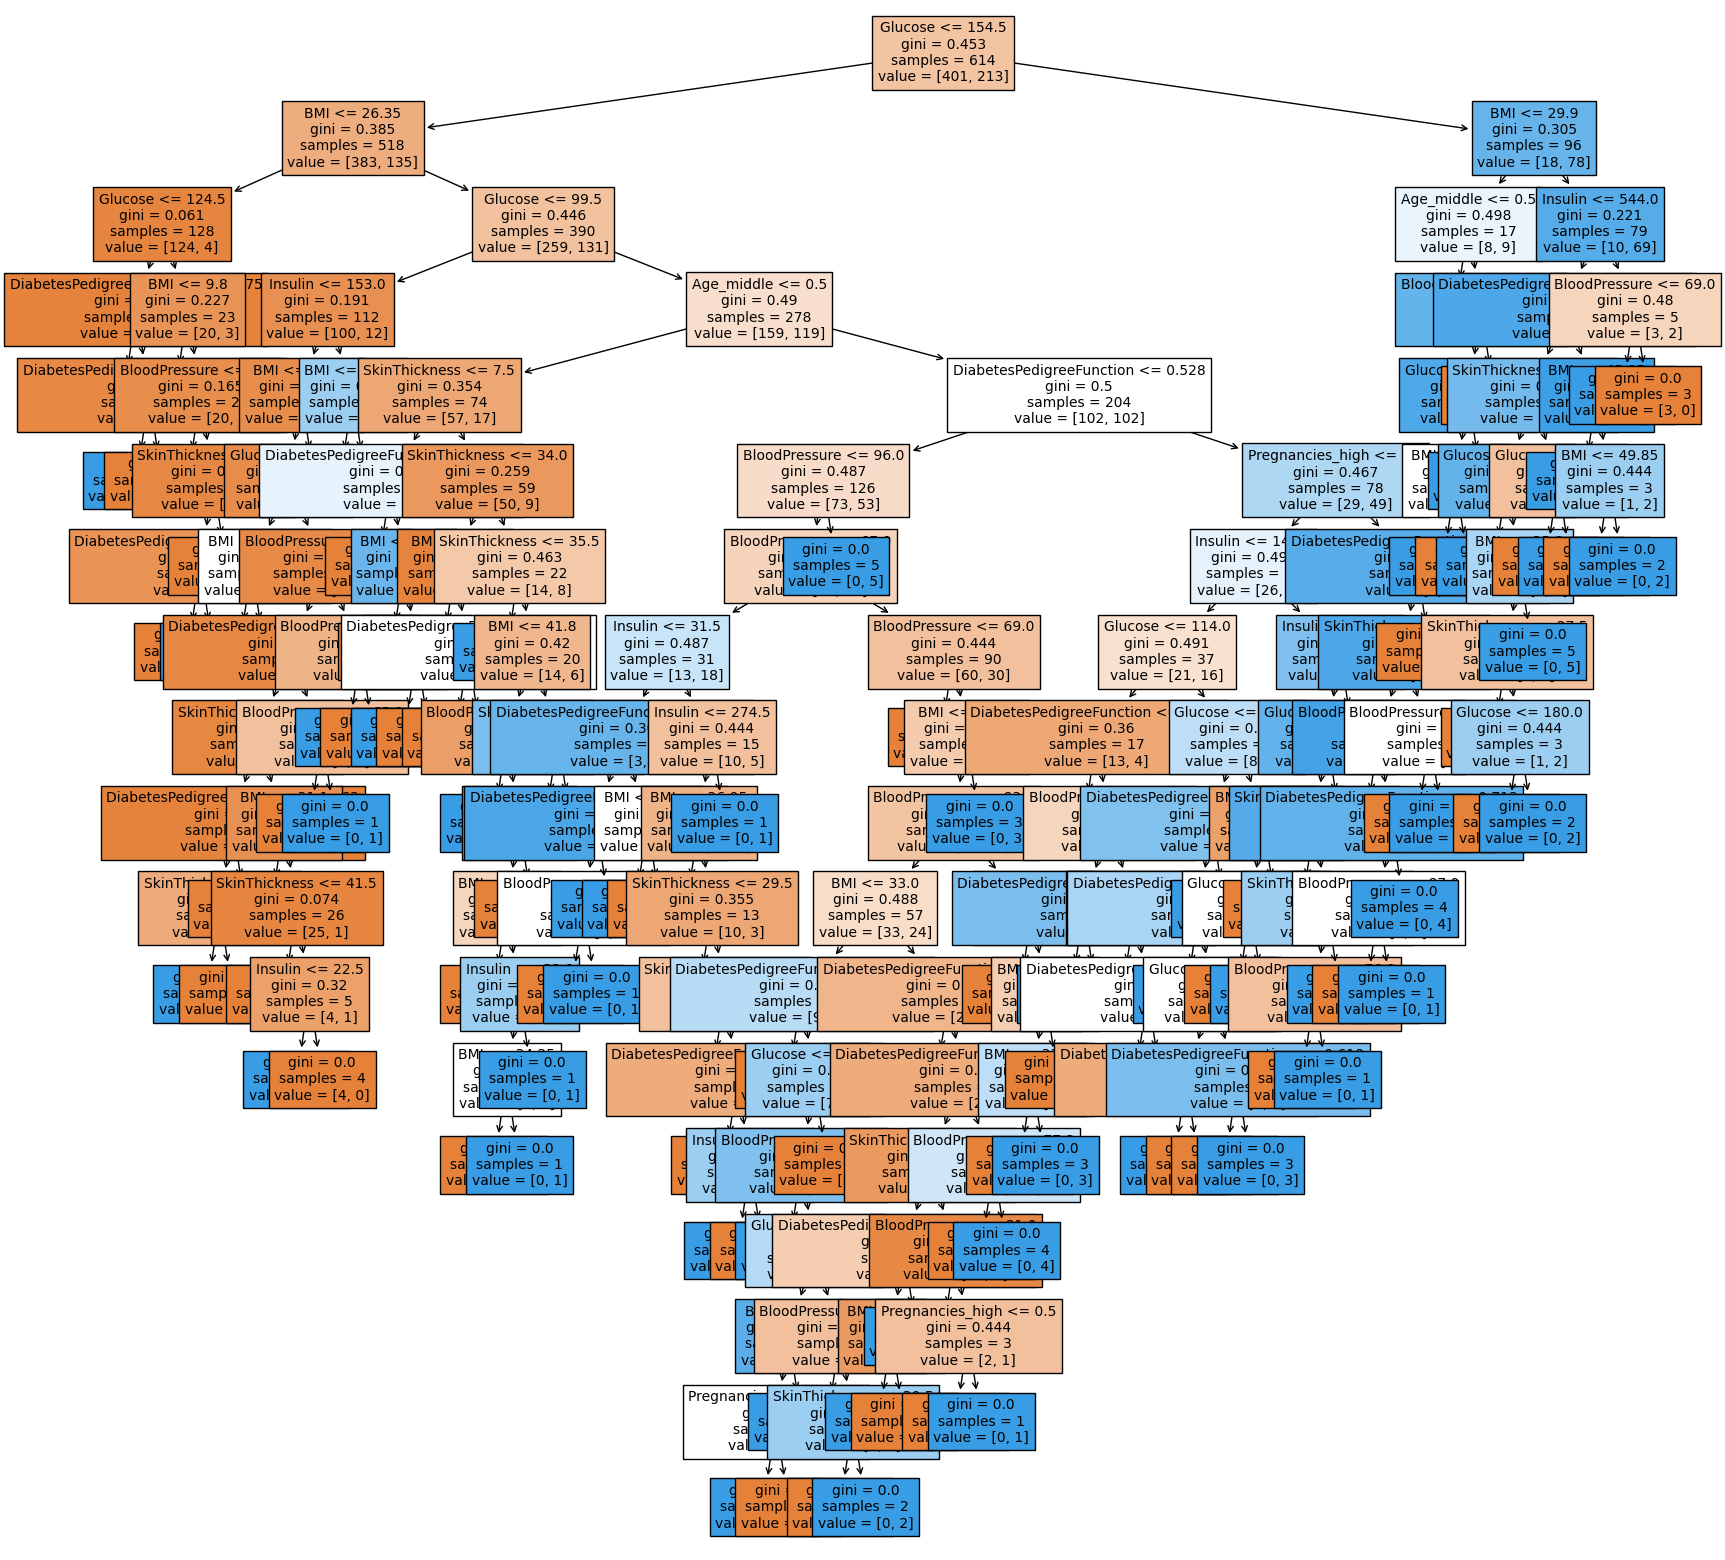

In [25]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
tree = plot_tree(model,
                 feature_names=feature_names,
                 filled=True,
                 fontsize=10)

<Axes: >

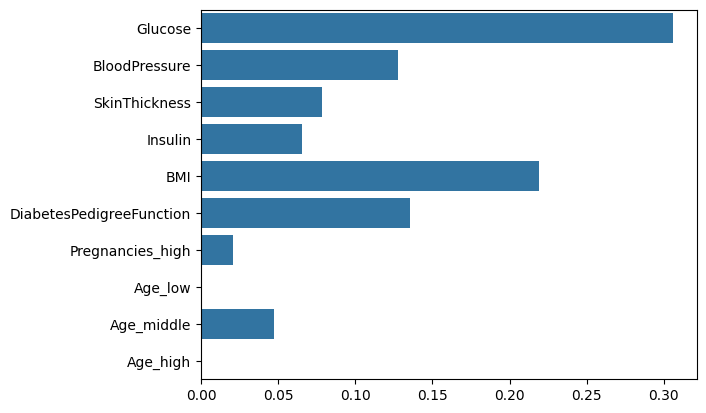

In [26]:
# 피처의 중요도 시각화 하기

sns.barplot(x=model.feature_importances_, y=feature_names)

## 정확도측정

In [27]:
# 직접구하기 (모델의 Random state고정을 하지 않았다면 결과값이 달라질 수 있다)

# 실제값 - 예측값을 빼주면 같은 값은 0으로 나오게 됩니다. 
# 여기에서 절대값을 씌운 값이 1인 값이 다르게 예측한 값이 됩니다.

diff_count = abs(y_test - y_predict).sum()
print(diff_count)
# 예측의 정확도를 구합니다. 100점 만점 중에 몇 점을 맞았는지 구한다고 보면 됩니다.

(len(y_test) - diff_count) / len(y_test) * 100


49


68.18181818181817

In [28]:
# 위에서 처럼 직접 구할 수도 있지만 미리 구현된 알고리즘을 가져와 사용합니다.
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

68.18181818181817

# Age를 범주화 (30세)

In [29]:
# One-Hot-Encoding
# 수치 => 범주 => 수치
df["Age_low"] = df["Age"] < 30
df["Age_middle"] = (df["Age"] >= 30) & (df["Age"] <= 60)
df["Age_high"] = df["Age"] > 60
df[["Age", "Age_low", "Age_middle", "Age_high"]].head()

,Age,Age_low,Age_middle,Age_high
0,50,False,True,False
1,31,False,True,False
2,32,False,True,False
3,21,True,False,False
4,33,False,True,False


<Axes: xlabel='Age_high', ylabel='count'>

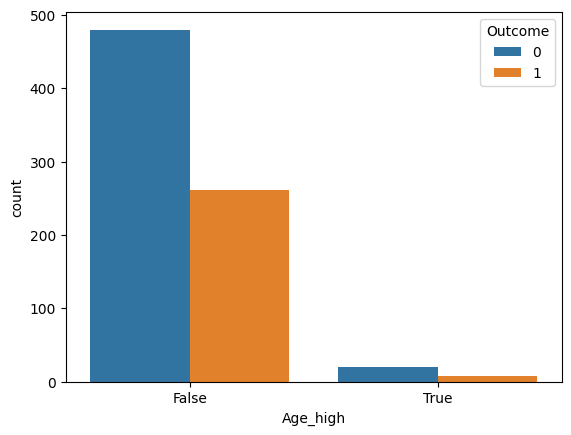

In [30]:
sns.countplot(data=df, x="Age_high", hue="Outcome")

# 데이터셋 나누기

In [31]:
# 8:2 의 비율로 구하기 위해 전체 데이터의 행에서 80% 위치에 해당되는 값을 구해서 split_count 라는 변수에 담습니다.
split_count = int(df.shape[0] * 0.8)
split_count
# train, test로 슬라이싱을 통해 데이터를 나눕니다.
train = df[:split_count].copy()
test = df[split_count:].copy()
print(train.shape, test.shape)

(614, 13) (154, 13)


In [32]:

# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.
feature_names = train.columns.tolist()
feature_names.remove('Pregnancies')
feature_names.remove('Outcome')
feature_names.remove('Age')
feature_names

label_name = 'Outcome'
label_name

'Outcome'

In [33]:

# Outcome은 결과이므로 train에서 제외!!
print(feature_names)
print(label_name)

# 학습 세트 만들기 예) 시험의 기출문제
X_train = train[feature_names]
y_train = train[label_name]
print(X_train.shape)
print(y_train.shape)
# 예측에 사용할 데이터세트를 만듭니다. 예) 실전 시험 문제
X_test = test[feature_names]
y_test = test[label_name]
print(X_test.shape)
print(y_test.shape)

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Pregnancies_high', 'Age_low', 'Age_middle', 'Age_high']
Outcome
(614, 10)
(614,)
(154, 10)
(154,)


In [34]:
X_train = train[feature_names]
X_train.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Pregnancies_high,Age_low,Age_middle,Age_high
0,148,72,35,0,33.6,0.627,False,False,True,False
1,85,66,29,0,26.6,0.351,False,False,True,False
2,183,64,0,0,23.3,0.672,True,False,True,False
3,89,66,23,94,28.1,0.167,False,True,False,False
4,137,40,35,168,43.1,2.288,False,False,True,False


In [35]:
X_test = test[feature_names]
X_test.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Pregnancies_high,Age_low,Age_middle,Age_high
614,138,74,26,144,36.1,0.557,True,False,True,False
615,106,72,0,0,25.8,0.207,False,True,False,False
616,117,96,0,0,28.7,0.157,False,False,True,False
617,68,62,13,15,20.1,0.257,False,True,False,False
618,112,82,24,0,28.2,1.282,True,False,True,False


In [36]:
y_test = test[label_name]
y_test.head()

614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

In [37]:
# 모델 불러오기
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model

DecisionTreeClassifier(random_state=42)

In [38]:
# 학습
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [39]:
# 예측
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 1, 0, 1], dtype=int64)

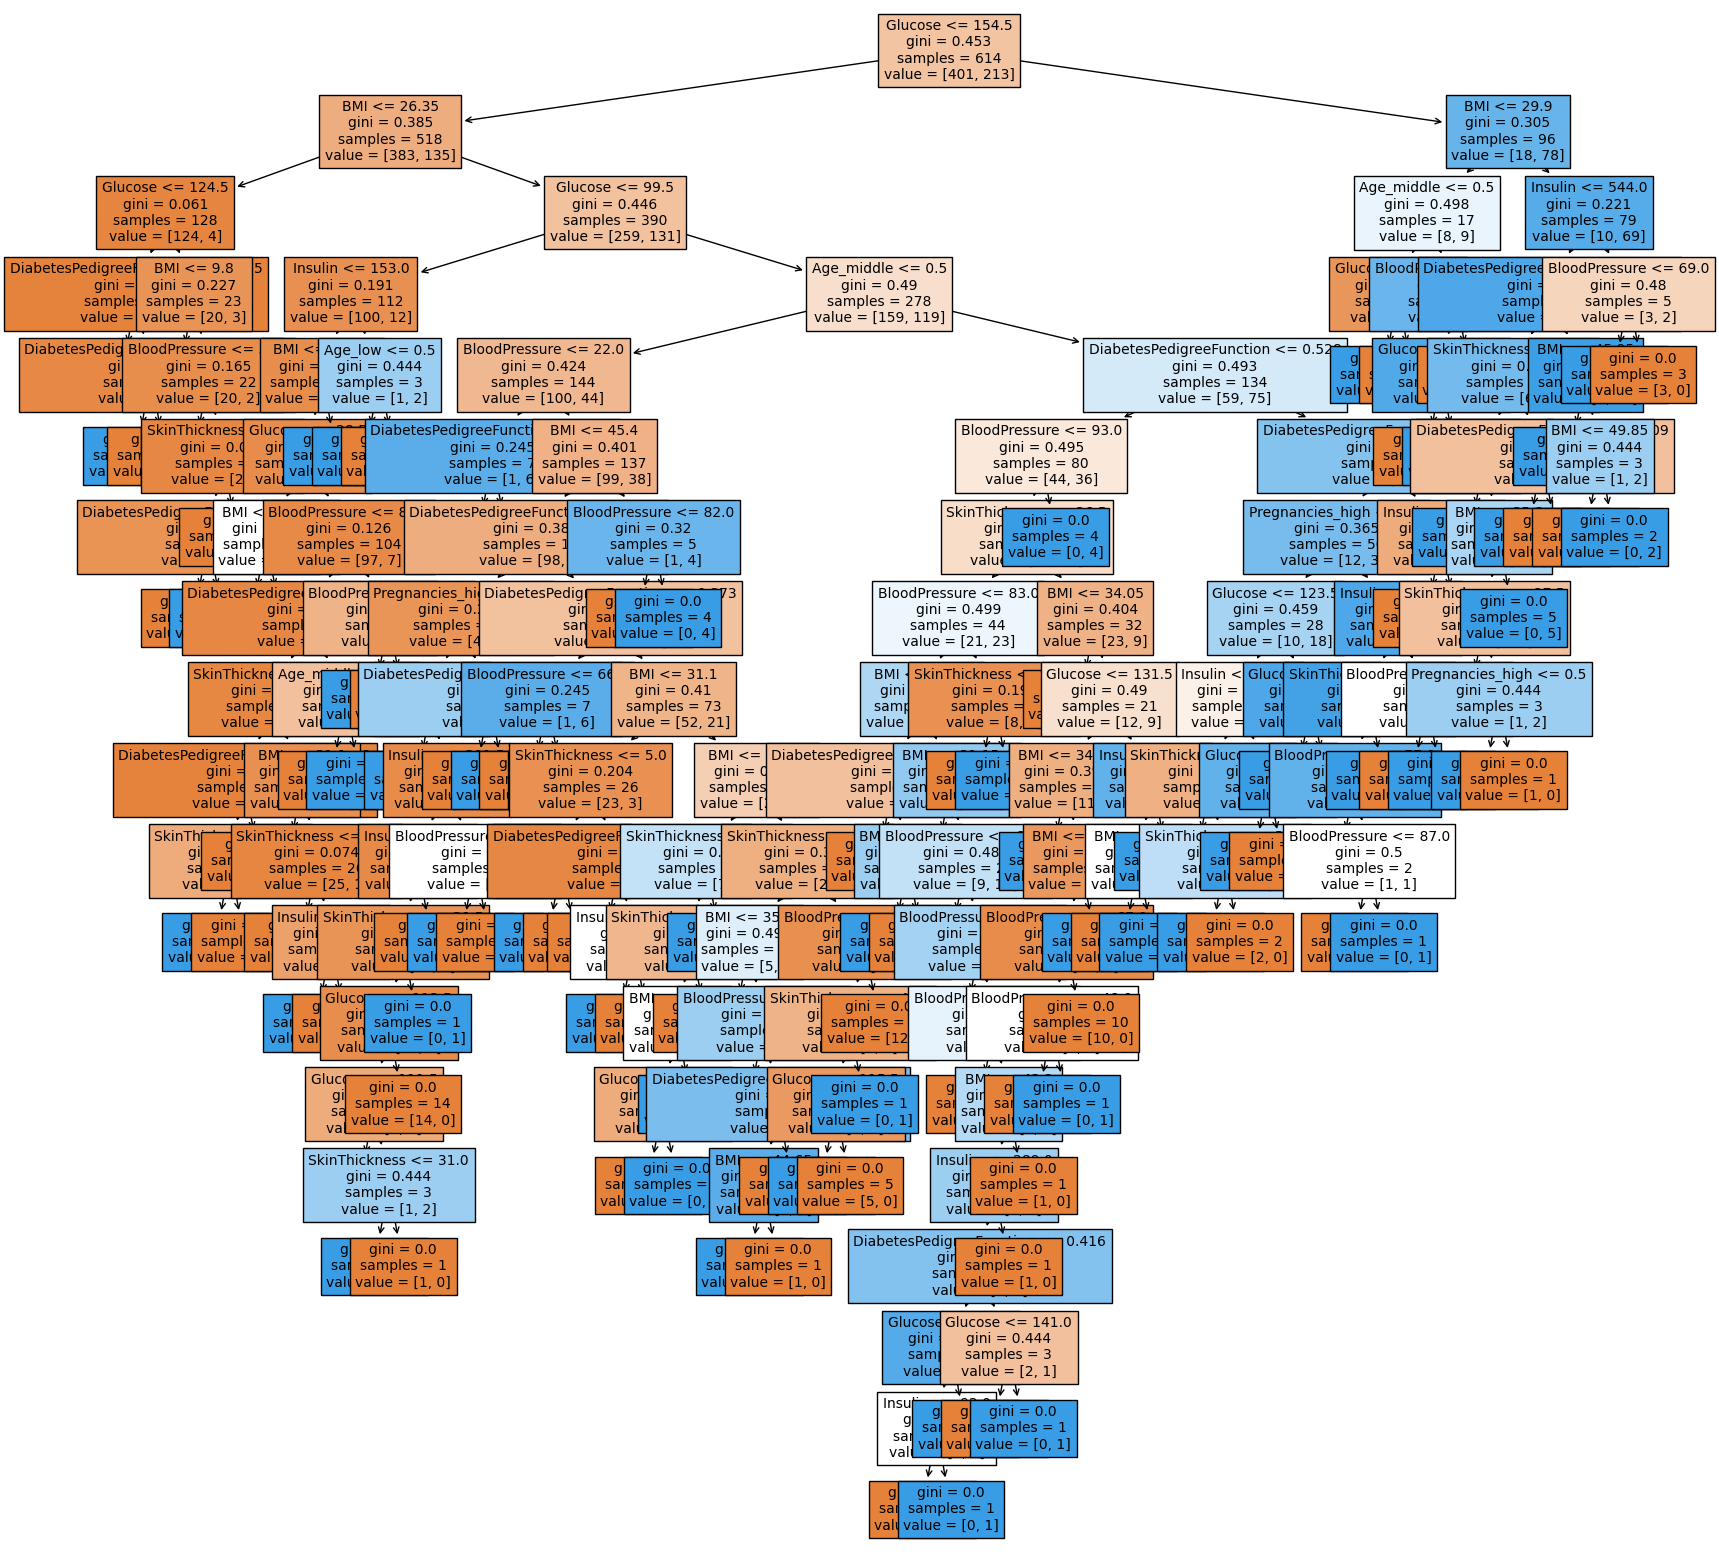

In [40]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
tree = plot_tree(model,
                 feature_names=feature_names,
                 filled=True,
                 fontsize=10)

<Axes: >

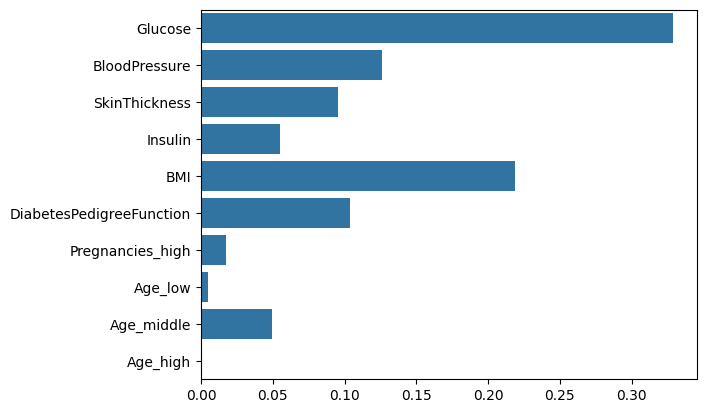

In [41]:
# 피처의 중요도 시각화 하기

sns.barplot(x=model.feature_importances_, y=feature_names)

## 정확도측정

In [42]:
# 직접구하기 (모델의 Random state고정을 하지 않았다면 결과값이 달라질 수 있다)

# 실제값 - 예측값을 빼주면 같은 값은 0으로 나오게 됩니다. 
# 여기에서 절대값을 씌운 값이 1인 값이 다르게 예측한 값이 됩니다.

diff_count = abs(y_test - y_predict).sum()
print(diff_count)
# 예측의 정확도를 구합니다. 100점 만점 중에 몇 점을 맞았는지 구한다고 보면 됩니다.

(len(y_test) - diff_count) / len(y_test) * 100


55


64.28571428571429

In [43]:
# 위에서 처럼 직접 구할 수도 있지만 미리 구현된 알고리즘을 가져와 사용합니다.
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

64.28571428571429

# 결측치 평균값으로 대체하기

In [44]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [45]:
df["Insulin_nan"] = df["Insulin"].replace(0, np.nan)
df[["Insulin", "Insulin_nan"]].head()

,Insulin,Insulin_nan
0,0,NaN
1,0,NaN
2,0,NaN
3,94,94.0
4,168,168.0


In [46]:
df["Insulin_nan"].isnull().sum()

374

In [47]:
# 결측치 비율
df["Insulin_nan"].isnull().mean()

0.4869791666666667

In [48]:
df.groupby(["Outcome"])[["Insulin", "Insulin_nan"]].agg(["mean", "median"])
# None처리에 따라 결과값 차이가 큼

Insulin        Insulin_nan       
               mean median        mean median
Outcome                                      
0         68.792000   39.0  130.287879  102.5
1        100.335821    0.0  206.846154  169.5

# None처리한 값으로는 머신러닝 학습이 불가해서 오류 남. 
# 별도 값으로 채워줘야 함

In [49]:
df.groupby(["Outcome"])[["Insulin", "Insulin_nan"]].describe()

Insulin                                                         \
          count        mean         std  min  25%   50%     75%    max   
Outcome                                                                  
0         500.0   68.792000   98.865289  0.0  0.0  39.0  105.00  744.0   
1         268.0  100.335821  138.689125  0.0  0.0   0.0  167.25  846.0   

        Insulin_nan                                                             
              count        mean         std   min    25%    50%     75%    max  
Outcome                                                                         
0             264.0  130.287879  102.482237  15.0   66.0  102.5  161.25  744.0  
1             130.0  206.846154  132.699898  14.0  127.5  169.5  239.25  846.0

In [50]:
df.groupby(["Outcome"])[["Insulin", "Insulin_nan"]].agg(["mean", "median"])

Insulin        Insulin_nan       
               mean median        mean median
Outcome                                      
0         68.792000   39.0  130.287879  102.5
1        100.335821    0.0  206.846154  169.5

# 결측치 채우기

In [83]:
# 결측치 채우기
df.loc[(df["Outcome"] == 0) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 102.5
df.loc[(df["Outcome"] == 1) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 169.5

# 위에서 구한 median값 사용

# feature 다시 조정 후 데이터셋 만들기

In [85]:
# 8:2 의 비율로 구하기 위해 전체 데이터의 행에서 80% 위치에 해당되는 값을 구해서 split_count 라는 변수에 담습니다.
split_count = int(df.shape[0] * 0.8)
split_count
# train, test로 슬라이싱을 통해 데이터를 나눕니다.
train = df[:split_count].copy()
test = df[split_count:].copy()
print(train.shape, test.shape)

(614, 14) (154, 14)


In [89]:

# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.
feature_names = train.columns.tolist()
feature_names.remove('Pregnancies')
feature_names.remove('Outcome')
feature_names.remove('Age_low') # 기존에 성능이 안좋게 나온 것 제외
feature_names.remove('Age_middle') # 기존에 성능이 안좋게 나온 것 제외
feature_names.remove('Age_high') # 기존에 성능이 안좋게 나온 것 제외
feature_names.remove('Insulin')

print(feature_names)

label_name = 'Outcome'
label_name

['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high', 'Insulin_nan']


'Outcome'

In [90]:

# Outcome은 결과이므로 train에서 제외!!
print(feature_names)
print(label_name)

# 학습 세트 만들기 예) 시험의 기출문제
X_train = train[feature_names]
y_train = train[label_name]
print(X_train.shape)
print(y_train.shape)
# 예측에 사용할 데이터세트를 만듭니다. 예) 실전 시험 문제
X_test = test[feature_names]
y_test = test[label_name]
print(X_test.shape)
print(y_test.shape)

['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high', 'Insulin_nan']
Outcome
(614, 8)
(614,)
(154, 8)
(154,)


In [91]:
X_train = train[feature_names]
X_train.head()

,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan
0,148,72,35,33.6,0.627,50,False,169.5
1,85,66,29,26.6,0.351,31,False,102.5
2,183,64,0,23.3,0.672,32,True,169.5
3,89,66,23,28.1,0.167,21,False,94.0
4,137,40,35,43.1,2.288,33,False,168.0


In [92]:
X_test = test[feature_names]
X_test.head()

,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan
614,138,74,26,36.1,0.557,50,True,144.0
615,106,72,0,25.8,0.207,27,False,102.5
616,117,96,0,28.7,0.157,30,False,102.5
617,68,62,13,20.1,0.257,23,False,15.0
618,112,82,24,28.2,1.282,50,True,169.5


In [93]:
y_test = test[label_name]
y_test.head()

614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

In [94]:
# 모델 불러오기
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model

DecisionTreeClassifier(random_state=42)

In [95]:
# 학습
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [96]:
# 예측
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 1], dtype=int64)

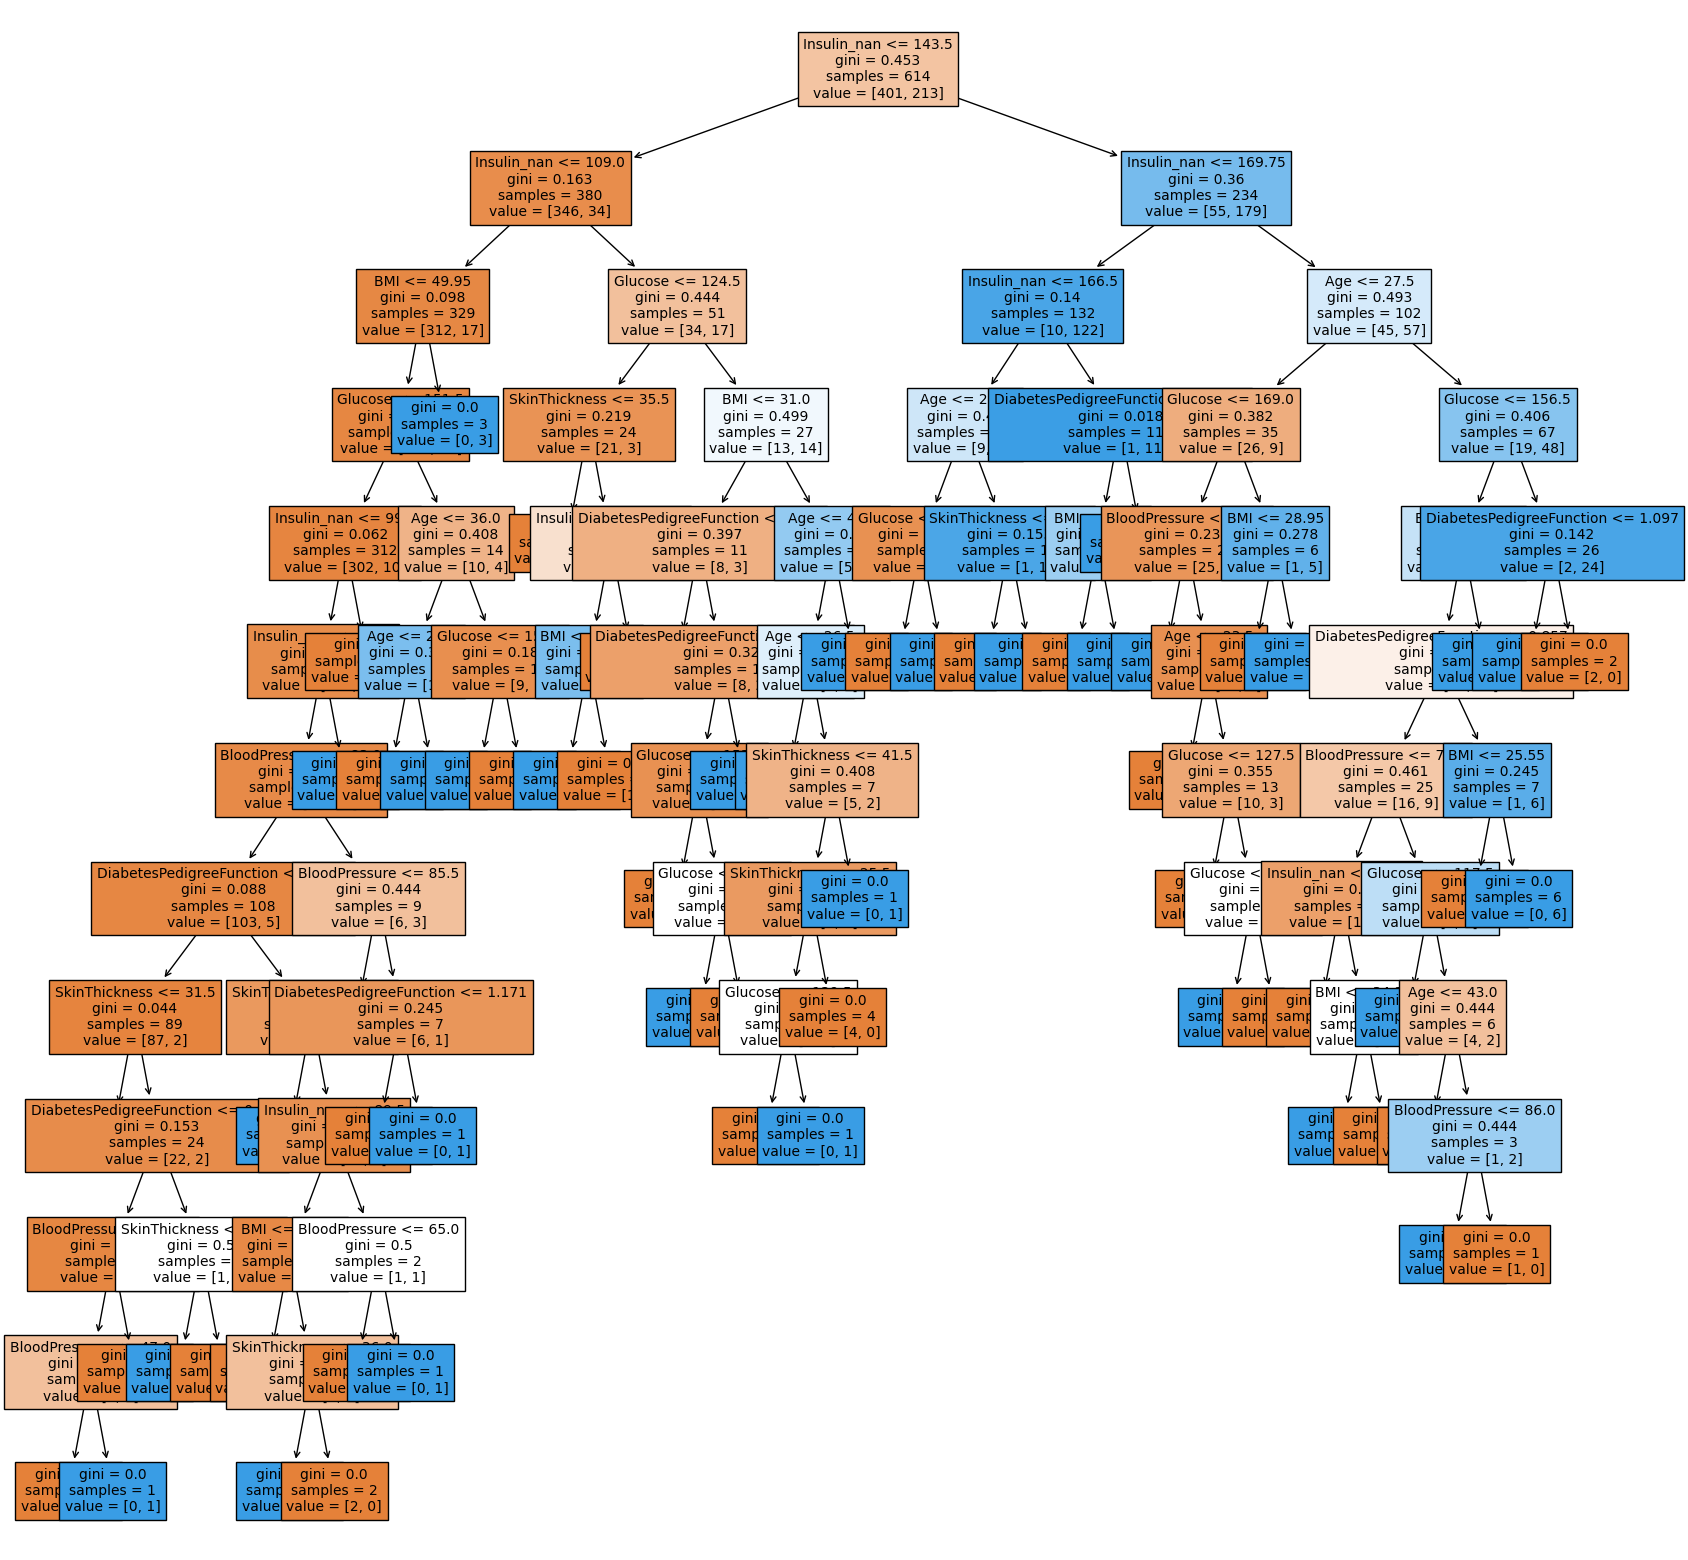

In [97]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
tree = plot_tree(model,
                 feature_names=feature_names,
                 filled=True,
                 fontsize=10)
# 기존에는 glucose가 가장 중요했지만 이제 insulin으로 바뀜

<Axes: >

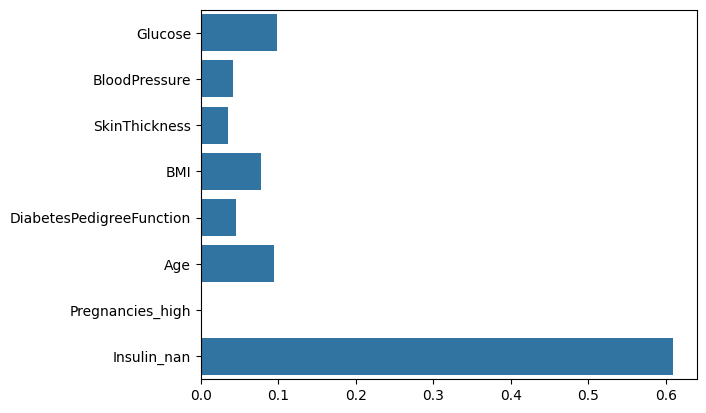

In [99]:
# 피처의 중요도 시각화 하기

sns.barplot(x=model.feature_importances_, y=feature_names)

## 정확도측정

In [100]:
# 직접구하기 (모델의 Random state고정을 하지 않았다면 결과값이 달라질 수 있다)

# 실제값 - 예측값을 빼주면 같은 값은 0으로 나오게 됩니다. 
# 여기에서 절대값을 씌운 값이 1인 값이 다르게 예측한 값이 됩니다.

diff_count = abs(y_test - y_predict).sum()
print(diff_count)
# 예측의 정확도를 구합니다. 100점 만점 중에 몇 점을 맞았는지 구한다고 보면 됩니다.

(len(y_test) - diff_count) / len(y_test) * 100


16


89.6103896103896

In [101]:
# 위에서 처럼 직접 구할 수도 있지만 미리 구현된 알고리즘을 가져와 사용합니다.
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

89.6103896103896